In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

## Data understanding

**Main info**

Data from:  [Data frames with columns explanations](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv)


**Where is the data from?**

Data frame includes data collected in 2015 from The Behavioral Risk Factor Surveillance System (BRFSS) which is a health-related telephone survey that is collected annually by the CDC.


**Main goal : predict the risk of diabetes**


Data frame Kaggle desc:
 **diabetes _ 012 _ health _ indicators _ BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.

**COLUMNS DESCRIPTION**

* Diabetes_012 : 0-no diabetes, 1- prediabetes, 2-diabates

* HighBP : 1-high blood pressure, 0- no

* HighChol: 1-high cholesterol, 0- no

* CholCheck : 1- cholesterol check in 5 years, 0- no

* BMI : Body Mass index

* Smoker : 1-have you smoked at leat 100 cigarettes in your life, 0-no

* Stroke : 1-has a stroke, 0-no

* HeartDisease : 1- coronary heart disease or myocardical infection, 0-no

* PhysActivity: 1- physical activity in past 30 days, 0-no

* Fruits : 1- consume fruits 1 or more times a day, 0-no

* Veggies: 1-consume vegetables 1 or more times a day, 0-no

* HvyAlcoholConsumption: 1- Adult woman having more than 7 drinks a week, men 14 drinks per week, 0-no

* AnyHealthcare : 1- any kind of healthcare inculding isurance etc, 0-no

* NoDocbcCost : 1- was there a time in the past year when you needed to see a doctor but could aford it, 0-no

* GenHealth: What do you sey your general health is on a scale 1-5, 1=excellent and 5=poor

* MentHlth: Scale 0-30

* PhysHlth:  how many days during past 30 days 

* DiffWalk : 1-you have serious difficulty walking or climbing stairs, 0-no

* Sex : 0-female, 1-male

* Age: 13-level category (_AGEG5YR) 1=18-24, 13 = 80 and older

* Education: education level 1-6 where 1=never attened school, 2=grades 1-8 ...

* Income: income scale 1-8, where 1<10,000$, 8>75,000$

**Business aim**

*Creating a programm (app) for medical workers (mostly doctors) to predict their patients diabetes-risks in order to prevent illness or initiate early tretment.*

*This can save bilions of dollars on diabetes treatments and reduce the amount of deaths from high stages of untreated diabetes*

## Basic data overview

In [4]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Observations: 
* there are no missing values 
* all columns are numeric, even though some of them are categorical "in reality"

## Train - Test split

In [3]:
from sklearn.model_selection import train_test_split

y = np.array(df['Diabetes_012']) #target feature
X = df.drop(['Diabetes_012'], axis=1) #input features

X_train, X_val, Y_train, Y_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, stratify=Y_val, test_size=0.3, random_state=42)


test_df = X_test
test_df['Diabetes_012']=Y_test

val_df = X_val
val_df['Diabetes_012']= Y_val

train_df = X_train
train_df['Diabetes_012']=Y_train

From now on we will be working on train_df, we will reach for val_df to validate our models later in the process. The test_df is for the validation team to test our work independently. 

## All features correlation

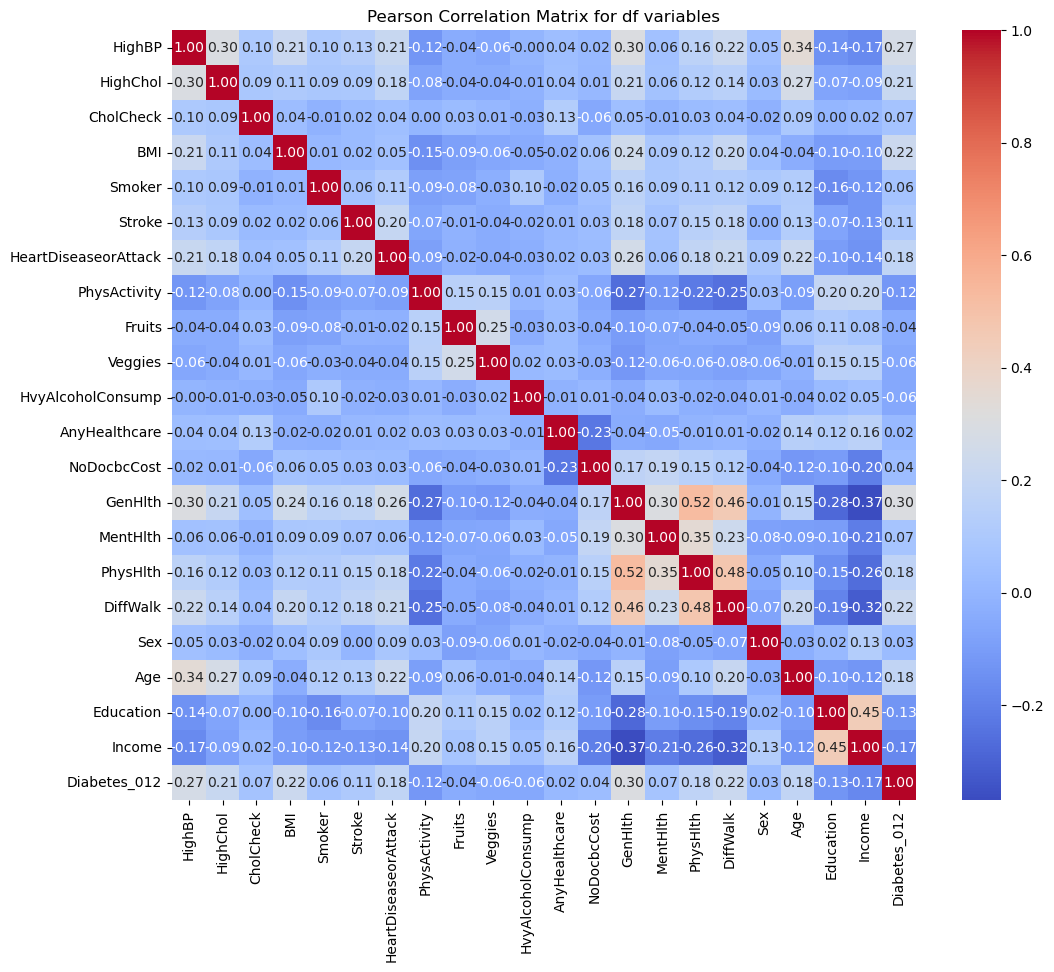

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for df variables")
plt.show()

Observations:
* We don't have very strong correlations
* The biggest corr is between Diabetes and HighBP, HighChol, BMI, GeneralHealt
* We don't have columns other than target that are very correlated with each other

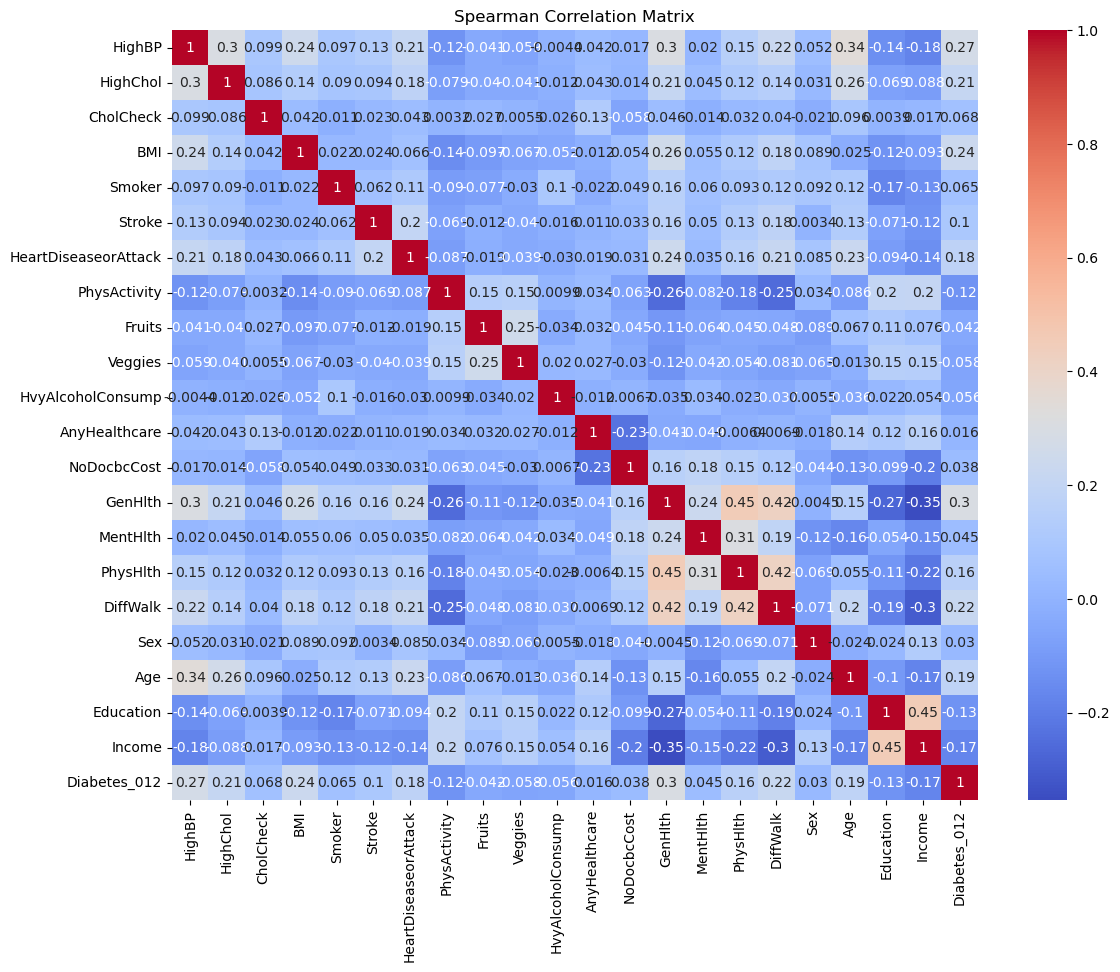

In [12]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

Spearman correlation shows similar results

## Diabetes (target) characteristics

In [5]:
px.histogram(df, x="Diabetes_012")

In [14]:
x=df.shape[0]
print("Percent of people without diabetes:" ,(df["Diabetes_012"]==0).sum()/x)
print("Percent of people with prediabetes:" ,(df["Diabetes_012"]==1).sum()/x)
print("Percent of people with diabetes:" ,(df["Diabetes_012"]==2).sum()/x)

Percent of people without diabetes: 0.8424116997792495
Percent of people with prediabetes: 0.018255282245348472
Percent of people with diabetes: 0.13933301797540207


Observations:
* We can see class imbalance - circa 84% of people don't have diabetes, only 14% have diabetes and circa 2% have prediabetes 
* Does this correspond to the real statistics in USA? 
 --> The real up-to-date statistics are very similar:  in 2021 38.4 million people of all ages in USA had diabetes (11.6% of the population) according to [National Institute of Diabetes](https://www.niddk.nih.gov/health-information/health-statistics/diabetes-statistics)

## Diabetes vs health related features

**Diabetes vs BMI**

In [15]:
fig = px.histogram(train_df,
                   x='BMI',
                   marginal='box',
                   nbins=47,
                   color='Diabetes_012',
                   color_discrete_sequence=['green',"yellow",'orange'],
                   title="BMI distribution"
                   )
fig.update_layout(bargap=0.1)
fig.show()
print("BMI vs diabetes corr: " , train_df.Diabetes_012.corr(train_df.BMI))

BMI vs diabetes corr:  0.22481360571936307


Observations:
* We can see many outliers - people with very high BMI 
* The median of BMI for people without diabetes is the lowest, for people with prediabetes the highest
* BMI distribution is close to normal distribution
* We can see a relationship between BMI and diabetes

**Diabetes vs blood pressure, cholesterol, smoking**

Text(0.5, 1.0, 'Smoking vs Diabetes')

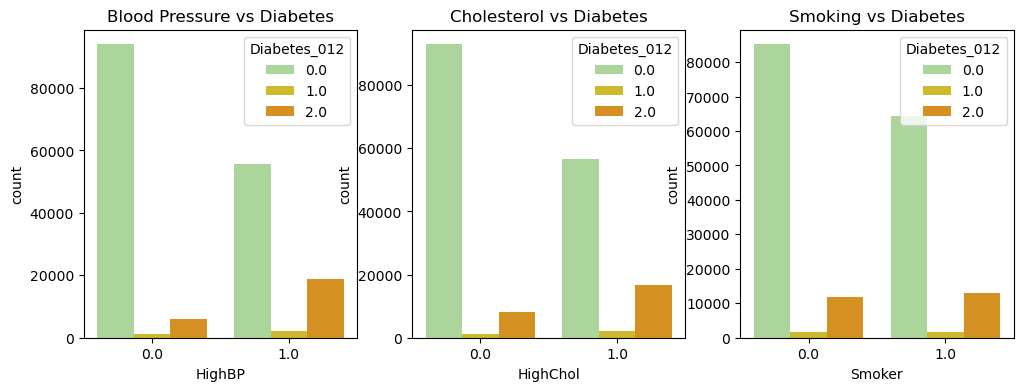

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
sns.countplot(data=train_df, x='HighBP', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0])
axs[0].set_title('Blood Pressure vs Diabetes')

sns.countplot(data=train_df, x='HighChol', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1])
axs[1].set_title('Cholesterol vs Diabetes')

sns.countplot(data=train_df, x='Smoker', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[2])
axs[2].set_title('Smoking vs Diabetes')


In [50]:
pd.crosstab(train_df['HighBP'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
HighBP                                      
0.0           92.803404  1.212432   5.984163
1.0           72.873958  2.639857  24.486185

In [59]:
pd.crosstab(train_df['HighChol'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
HighChol                                    
0.0           90.828316  1.189592   7.982093
1.0           75.288288  2.690243  22.021469

In [60]:
pd.crosstab(train_df['Smoker'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
Smoker                                      
0.0           86.347455  1.638995  12.013550
1.0           81.611568  2.058775  16.329657

Observations:
* There are more ill people among people with HighBP and HighChol
* Results for Blood pressure and cholesterol are very similar
* Only circa 6-7% of people without highBP or HighChol have diabetes
* Smoking doesn't seem to have an impact on diabetes. In both groups the percentage of ill people is similar, the correlation from the matrix is also low

**Diabetes vs other illness**

Text(0.5, 1.0, 'Stroke vs Diabetes')

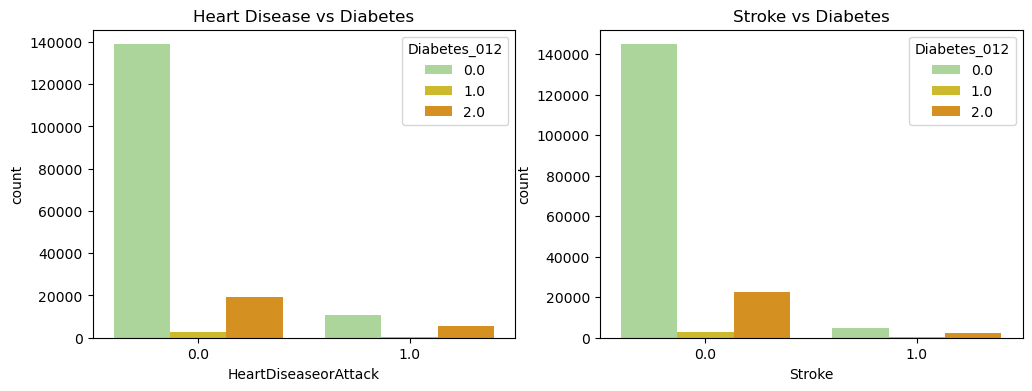

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(data=train_df, x='HeartDiseaseorAttack', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0])
axs[0].set_title('Heart Disease vs Diabetes')

sns.countplot(data=train_df, x='Stroke', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1])
axs[1].set_title('Stroke vs Diabetes')

In [62]:
pd.crosstab(train_df['Stroke'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
Stroke                                      
0.0           85.016141  1.801373  13.182485
1.0           65.917291  2.400777  31.681932

In [65]:
pd.crosstab(train_df['HeartDiseaseorAttack'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012                0.0       1.0        2.0
HeartDiseaseorAttack                                
0.0                   86.311766  1.732861  11.955373
1.0                   64.275440  2.720844  33.003716

Observations:
* There is class imbalance - way more people who don't have heart problems, didn't have a stroke
* looking at the percentage tables we can see that the percent of people with diabates/prediabetes is higher among people with other illness
* the statistics are very similar in case of heart disease and stroke

**Lifestyle vs diabetes**

Text(0.5, 1.0, 'Alcoholism vs Diabetes')

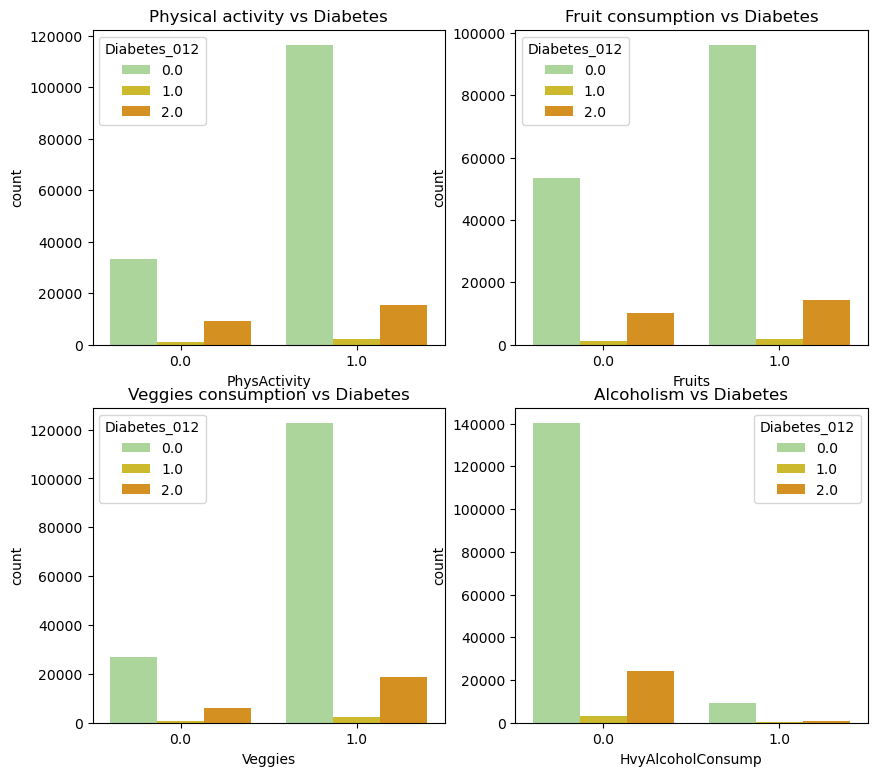

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
sns.countplot(data=train_df, x='PhysActivity', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0,0])
axs[0,0].set_title('Physical activity vs Diabetes')

sns.countplot(data=train_df, x='Fruits', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[0,1])
axs[0,1].set_title('Fruit consumption vs Diabetes')

sns.countplot(data=train_df, x='Veggies', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1,0])
axs[1,0].set_title('Veggies consumption vs Diabetes')

sns.countplot(data=train_df, x='HvyAlcoholConsump', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'], ax=axs[1,1])
axs[1,1].set_title('Alcoholism vs Diabetes')

We can't say much from the plots because there again is class imbalace. Let's look at percentage tables:

In [70]:
pd.crosstab(train_df['PhysActivity'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
PhysActivity                                
0.0           76.505885  2.349411  21.144703
1.0           86.737780  1.656660  11.605560

* There are more prople with diabetes/prediabetes among people who have little physical activity

In [71]:
pd.crosstab(train_df['Fruits'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0      1.0        2.0
Fruits                                     
0.0           82.222633  1.97971  15.797657
1.0           85.405401  1.73686  12.857739

In [72]:
pd.crosstab(train_df['Veggies'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012        0.0       1.0        2.0
Veggies                                     
0.0           79.895585  2.234487  17.869928
1.0           85.252263  1.730577  13.017160

* Vegetables seem to have greater impact on diabetes than fruits, there are more healthy people among the group who eats veggies

In [74]:
pd.crosstab(train_df['HvyAlcoholConsump'], train_df['Diabetes_012'],normalize='index')*100

Diabetes_012            0.0       1.0        2.0
HvyAlcoholConsump                               
0.0                83.74833  1.844517  14.407154
1.0                92.54827  1.508447   5.943282

* Suprisingly there are very little people with diabetes or prediabetes among alocholics, the correlation is <0 

**Diabetes vs general health**

Reminder: 1-excellent, 5-poor

<Axes: xlabel='GenHlth', ylabel='count'>

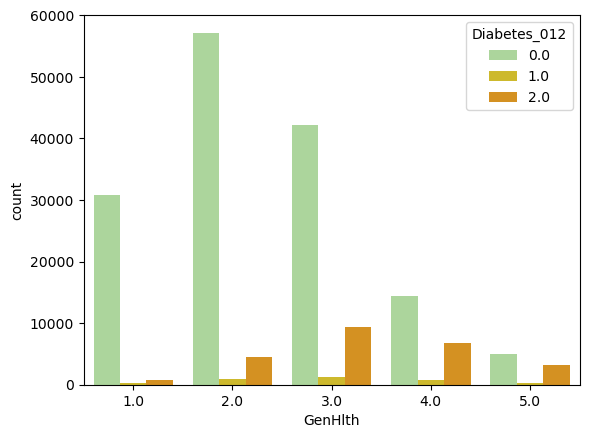

In [76]:
sns.countplot(data=train_df, x='GenHlth', hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

* We can see the number of people with diabetes is the lowest for people with excellent general health, then the number increases up to medium health
* The most responders categorised their health between 1-3

## Diabetes vs other non-medical features

**Age vs diabetes**

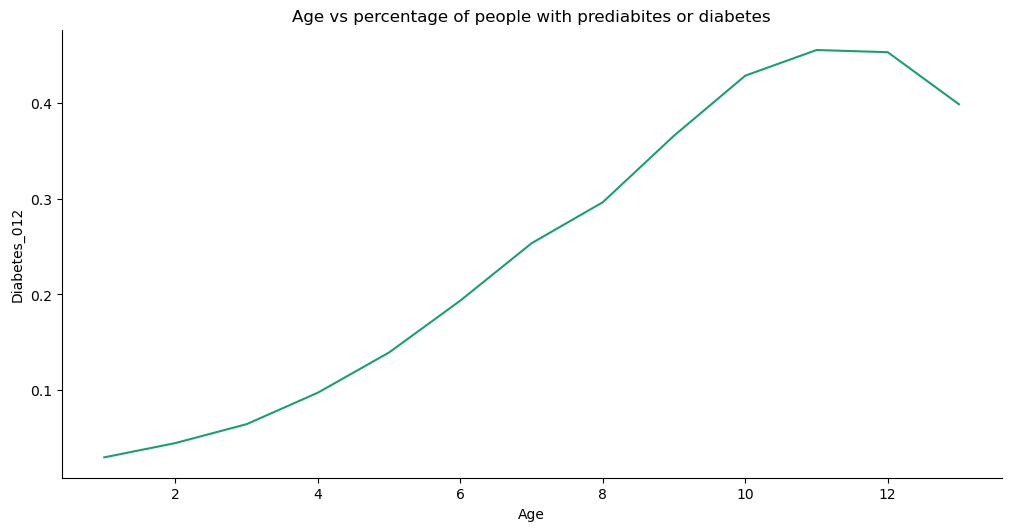

In [80]:
train_df_01 = train_df.copy()
train_df_01[train_df_01['Diabetes_012']==2] = 1

age_diabetes_percentage = train_df.groupby('Age')['Diabetes_012'].mean().reset_index()
age_diabetes_percentage

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Age']
  ys = series['Diabetes_012']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = age_diabetes_percentage.sort_values('Age', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title('Age vs percentage of people with prediabites or diabetes')
plt.xlabel('Age')
_ = plt.ylabel('Diabetes_012')

* There is a strong relationship between age and diabetes
* The percentage of ill people increases with age 

<Axes: xlabel='Education', ylabel='count'>

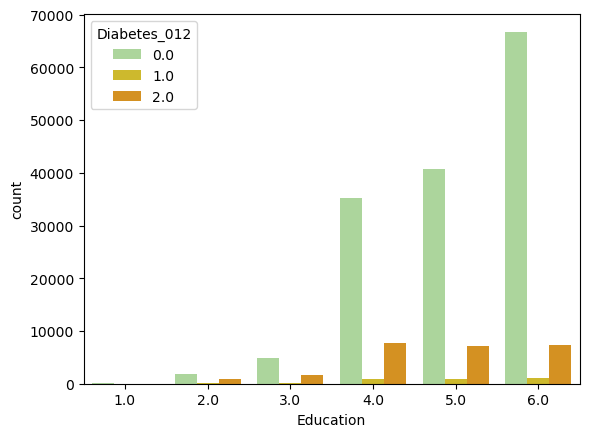

In [85]:
sns.countplot(train_df, x='Education',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

* There are mostly well educated people
* Diabetes is on the same level for education leves 4,5,6 but the number of people increases so the percentage of ill people dicreases for more educated people

**Diabetes vs sex**

0-female
1-male

<Axes: xlabel='Sex', ylabel='count'>

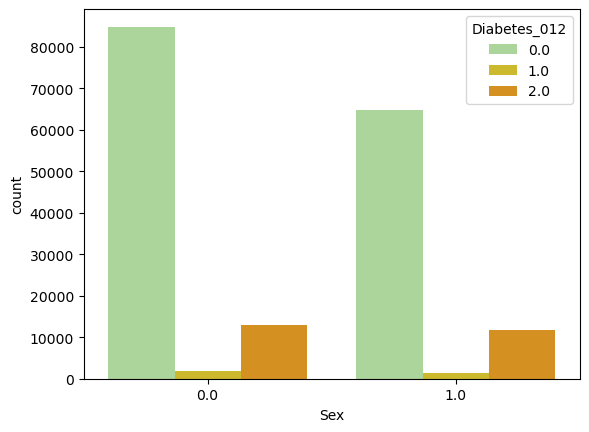

In [86]:
sns.countplot(train_df, x='Sex',hue='Diabetes_012',palette=['#a8df92','#e7cd13','#f19805'])

In [87]:
pd.crosstab(train_df["Sex"],train_df["Diabetes_012"], normalize='index')*100

Diabetes_012        0.0       1.0        2.0
Sex                                         
0.0           85.193743  1.846512  12.959744
1.0           83.026000  1.799147  15.174853

* The percentage of ill people is very similar for both genders

**Diabetes vs income**

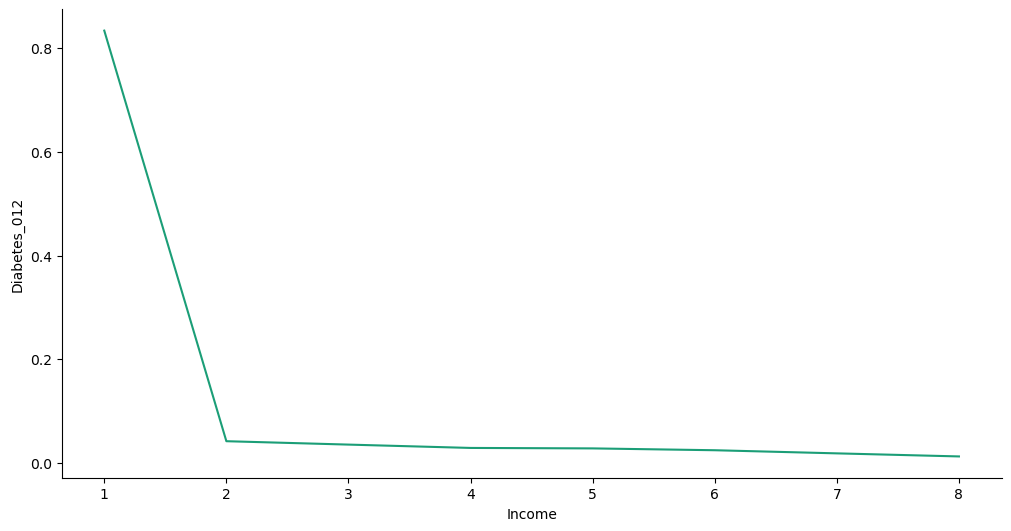

In [6]:
train_df_01 = train_df.copy()

train_df_01[train_df_01['Diabetes_012']==2]=1

age_diabetes_percentage = train_df_01.groupby('Income')['Diabetes_012'].mean().reset_index()
age_diabetes_percentage

def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  #import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Income']
  ys = series['Diabetes_012']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = age_diabetes_percentage.sort_values('Income', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Income')
_ = plt.ylabel('Diabetes_012')

* the percentage of people with diabetes is the highest for people with the smallest income
* lets check income distribution

<Axes: xlabel='Income', ylabel='count'>

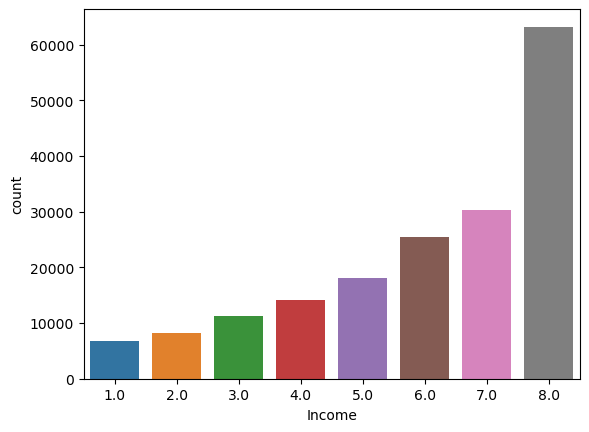

In [7]:
sns.countplot(train_df, x='Income')

* income is also categorical 
* the most responders have high income